In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

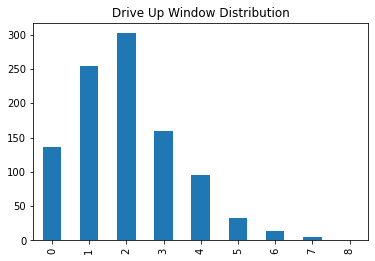

In [105]:
drive_up_window = stats.poisson(2)
pd.Series(drive_up_window.rvs(1000)).value_counts().sort_index().plot.bar()
plt.title('Drive Up Window Distribution')
plt.show()

- What is the probability that no cars drive up in the noon hour?

In [93]:
# Experimental probability -- Create a simulation
n_simulations = n_rows = 10_000
n_columns = 1 

simulation = np.random.poisson(2, (n_rows, n_columns))
simulation_df = pd.DataFrame(simulation)

In [94]:
# Converting to a pandas dataframe with a column matching our condition
simulation_df['no_cars'] = simulation_df[0] == 0
simulation_df

,0,no_cars
0,2,False
1,0,True
2,1,False
3,4,False
4,3,False
...,...,...
9995,2,False
9996,5,False
9997,3,False
9998,2,False


In [95]:
#Experimenatal Probability
simulation_df['no_cars'].mean() 

0.1324

In [96]:
#Theoretical probabiity
drive_up_window.pmf(0) 

0.1353352832366127

- What is the probability that 3 or more cars come through the drive through?

In [74]:
#Experimental probability - Adding column with new paramater 
simulation_df['3_or_more'] = simulation_df[0] >= 3

In [75]:
#Experimental Probability 
simulation_df['3_or_more'].mean()

0.3306

In [64]:
#theoretical probability
drive_up_window.sf(2) 

0.32332358381693654

- How likely is it that the drive through gets at least 1 car?

In [79]:
#Experimental probability - Adding column with new paramater 
simulation_df['at_least_1'] = simulation_df[0] >= 1
simulation_df.head()

,0,no_cars,3_or_more,at_least_1
0,1,False,False,True
1,5,False,True,True
2,2,False,False,True
3,1,False,False,True
4,2,False,False,True


In [80]:
#Experimental Probability 
simulation_df['at_least_1'].mean()

0.8682

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?

In [65]:
#Theoretical probability
drive_up_window.sf(0)

0.8646647167633873

In [146]:
#Create our distribution
mean = 3.0
stdev = .3
grades = stats.norm(mean, stdev)


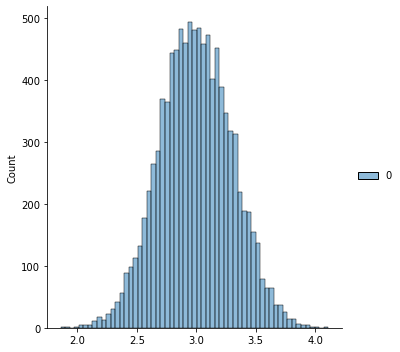

In [145]:
#Experimental probability plotted
n_simulations = s = 10_000
simulation = np.random.normal(mean, stdev, n)
simulation = pd.DataFrame(simulation)

sns.displot(simulation)
x = np.linspace(mean - 3*stdev, mean + 3*stdev, 1000)
y = stats.norm.pdf(x, mean, stdev)


In [197]:
#Experimental probability
simulation.quantile(.95)

0    3.496229
Name: 0.95, dtype: float64

In [129]:
#Theoretical probability
top_5_percent = grades.ppf(.95)
top_5_percent

3.4934560880854417

- What GPA constitutes the bottom 15% of the class?

In [149]:
#Theorteical 
bottom_15_percent = grades.ppf(.15)
bottom_15_percent

2.689069983151863

In [198]:
#Experimental
simulation.quantile(.15)

0    2.686465
Name: 0.15, dtype: float64

- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [151]:
#Theoretical
third_decile_from_bottom = grades.ppf([.2, .3])
third_decile_from_bottom # Yes, 2.8 would qualify for the scholarship.

array([2.74751363, 2.84267985])

In [200]:
#Experimental
print(simulation.quantile(.20))
print(simulation.quantile(.30))

0    2.741443
Name: 0.2, dtype: float64
0    2.834219
Name: 0.3, dtype: float64


- If I have a GPA of 3.5, what percentile am I in?

In [152]:
#Theoretical 
grades.cdf(3.5) #95th Percentile

0.9522096477271853

In [201]:
#Experimental
(simulation <= 3.5).mean()

0    0.951
dtype: float64

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [207]:
#Theoretical probabiity 
marketing_website = stats.binom(4326, .02)
marketing_website.sf(96)

0.13975823631416445

In [215]:
#Experimental probability
marketing_sim = stats.binom(4326, .02).rvs(10_000)
marketing_sim = pd.DataFrame(marketing_sim)
(marketing_sim >= 97).mean()

0    0.1416
dtype: float64

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [264]:
#Theoretical probability 
statistics_hw = stats.binom(60,1/100)
statistics_hw.sf(0)

0.45284335760923855

In [214]:
#Experimental probability
(statistics_hw.rvs(10_000) >= 1).mean()

0.4516

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [276]:
#Theoretical probability - Each day
students = (3 * 22 *.90)
each_day = stats.binom(students, .03)
each_day.sf(0)

0.8362274861228872

In [262]:
#Experimental

(students.rvs(10_000) >= 1).mean()

AttributeError: 'int' object has no attribute 'rvs'

In [159]:
#Theoretical probability - two days
stats.binom(students * 2, .03).pmf(0)

0.026821436301628997

In [160]:
#Theoretical probability - 1 week
stats.binom(students * 5, .03).pmf(0)

0.00011781621791055051

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [235]:
# Number of people
line_mean = 15
line_std = 3 

#Minutes
time_to_order = 2 
wait_for_food = 10
time_for_lunch = 60 
eat_time = 15


In [241]:
# What time we need to start our order
start_order_by = time_for_lunch - time_to_order - wait_for_food - eat_time
start_order_by

33

In [242]:
#Theoretical probability
stats.norm(line_mean * time_to_order, line_std * time_to_order).cdf(start_order_by)

0.6914624612740131

In [244]:
#Experimental probability
(np.random.normal(line_mean * time_to_order, line_std * time_to_order, 10_000) <= start_order_by).mean()

0.6987

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [169]:
from env import host, user, password, get_db_url

In [176]:
salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date > NOW()', get_db_url('employees'))
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [177]:
#Average salary of current employees
avg_salary = salaries.salary.mean()
avg_salary

72012.23585730705

In [178]:
#Standard deviation of current salaries 
salary_std = salaries.salary.std()
salary_std

17309.99538025198

In [181]:
#Modeling with a normal distribution
salary_distribution = stats.norm(avg_salary, salary_std)

- What percent of employees earn less than 60,000?

In [185]:
#Theoretical 
salary_distribution.cdf(60_000)

0.24385742480214423

In [187]:
#Actual
(salaries.salary < 60_000).mean()

0.2705727041028802

- What percent of employees earn more than 95,000?

In [188]:
#Theoretical 
salary_distribution.sf(95_000)

0.09208819199804053

In [189]:
#Actual 
(salaries.salary > 95_000).mean()

0.1086272092752078

- What percent of employees earn between 65,000 and 80,000?

In [193]:
#Theoretical
salary_distribution.cdf(80_000) - salary_distribution.cdf(65_000)

0.3350605685446666

In [192]:
#Actual 
((salaries.salary > 65_000) & (salaries.salary < 80_000)).mean()

0.325107028035515

- What do the top 5% of employees make?

In [195]:
#Theoretical 
salary_distribution.isf(.05)

100484.64454102777

In [196]:
#Actual 
salaries.salary.quantile(.95)

104225.84999999998